In [1]:
import random

In [3]:
def calculate_completion_time(schedule, execution_times, m):
    processor_times = [0] * m
    for task, processor in enumerate(schedule):
        processor_times[processor] += execution_times[task][processor]
    return max(processor_times)

In [4]:
def simulated_annealing(execution_times, m, max_iterations):
    n = len(execution_times)
    schedule = [random.randint(0, m - 1) for _ in range(n)]
    current_makespan = calculate_completion_time(schedule, execution_times, m)
    best_schedule = schedule[:]
    best_makespan = current_makespan

    for i in range(1,max_iterations):
        new_schedule = schedule[:]
        task = random.randint(0, n - 1)
        new_schedule[task] = random.randint(0, m - 1)

        new_makespan = calculate_completion_time(new_schedule, execution_times, m)
        
        if new_makespan < current_makespan:
            schedule = new_schedule
            current_makespan = new_makespan

            if new_makespan < best_makespan:
                best_schedule = new_schedule[:]
                best_makespan = new_makespan
                
        else:
            p = 1.0 / i ** 0.5
            q = random.uniform(0, 1)
            if p > q:
                schedule = new_schedule
                current_makespan = new_makespan

    return best_schedule, best_makespan

In [6]:
T = 4  # broj zadataka
m = 2  # broj procesora
execution_times = [
    [3, 2],
    [2, 1],
    [4, 3],
    [1, 2],
]

max_iterations = 100

best_schedule, best_makespan = simulated_annealing(execution_times, m, max_iterations)

print(f"Najbolji raspored: {best_schedule}")
print(f"Minimalno vreme završetka: {best_makespan}")

Najbolji raspored: [0, 1, 1, 0]
Minimalno vreme završetka: 4


Najbolji raspored: [0, 1, 1, 0]
Minimalno vreme završetka: 4


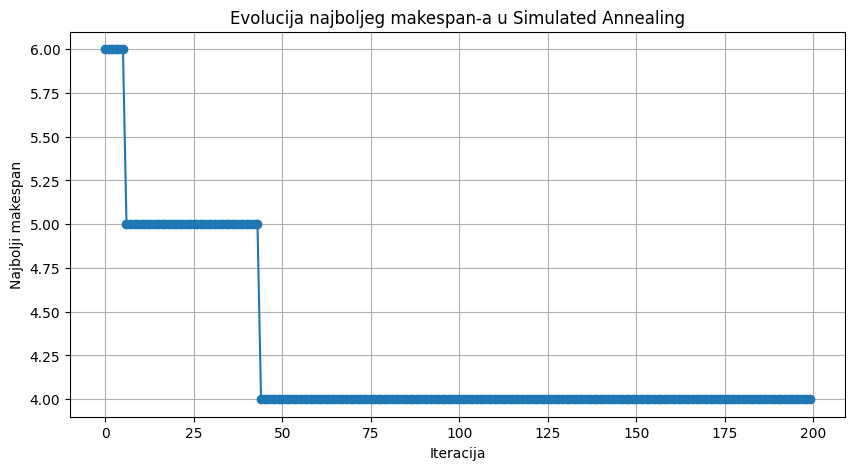

In [11]:
import matplotlib.pyplot as plt
import random

def simulated_annealing_with_history(execution_times, m, max_iterations):
    n = len(execution_times)
    schedule = [random.randint(0, m - 1) for _ in range(n)]
    current_makespan = calculate_completion_time(schedule, execution_times, m)
    best_schedule = schedule[:]
    best_makespan = current_makespan
    history = [best_makespan]

    for i in range(1, max_iterations):
        new_schedule = schedule[:]
        task = random.randint(0, n - 1)
        new_schedule[task] = random.randint(0, m - 1)
        new_makespan = calculate_completion_time(new_schedule, execution_times, m)
        
        if new_makespan < current_makespan:
            schedule = new_schedule
            current_makespan = new_makespan
            if new_makespan < best_makespan:
                best_schedule = new_schedule[:]
                best_makespan = new_makespan
        else:
            p = 1.0 / i ** 0.5
            if random.uniform(0,1) < p:
                schedule = new_schedule
                current_makespan = new_makespan

        history.append(best_makespan)

    return best_schedule, best_makespan, history

# Primer
T = 4
m = 2
execution_times = [
    [3, 2],
    [2, 1],
    [4, 3],
    [1, 2],  
]

best_schedule, best_makespan, history = simulated_annealing_with_history(execution_times, m, 200)

print(f"Najbolji raspored: {best_schedule}")
print(f"Minimalno vreme završetka: {best_makespan}")

# Vizuelizacija
plt.figure(figsize=(10,5))
plt.plot(history, marker='o')
plt.xlabel("Iteracija")
plt.ylabel("Najbolji makespan")
plt.title("Evolucija najboljeg makespan-a u Simulated Annealing")
plt.grid(True)
plt.show()
